In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pip install tensorflow==2.0

In [2]:
# TF 2.0 must be installed manually as the default version of TF in Colab is yet 1.15.0.
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 피마 인디언 당뇨병 데이터셋을 불러옴. 각 컬럼에 해당하는 이름을 지정함.
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/deep-learning-for-everyone/dataset/pima-indians-diabetes.csv',
               names = ["pregnant", "plasma", "pressure", "thickness", "insulin", "BMI", "pedigree", "age", "class"])

In [4]:
print(df.head(5))

   pregnant  plasma  pressure  thickness  insulin   BMI  pedigree  age  class
0         6     148        72         35        0  33.6     0.627   50      1
1         1      85        66         29        0  26.6     0.351   31      0
2         8     183        64          0        0  23.3     0.672   32      1
3         1      89        66         23       94  28.1     0.167   21      0
4         0     137        40         35      168  43.1     2.288   33      1


In [5]:
df.head()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant     768 non-null int64
plasma       768 non-null int64
pressure     768 non-null int64
thickness    768 non-null int64
insulin      768 non-null int64
BMI          768 non-null float64
pedigree     768 non-null float64
age          768 non-null int64
class        768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [7]:
print(df.describe())

         pregnant      plasma    pressure  ...    pedigree         age       class
count  768.000000  768.000000  768.000000  ...  768.000000  768.000000  768.000000
mean     3.845052  120.894531   69.105469  ...    0.471876   33.240885    0.348958
std      3.369578   31.972618   19.355807  ...    0.331329   11.760232    0.476951
min      0.000000    0.000000    0.000000  ...    0.078000   21.000000    0.000000
25%      1.000000   99.000000   62.000000  ...    0.243750   24.000000    0.000000
50%      3.000000  117.000000   72.000000  ...    0.372500   29.000000    0.000000
75%      6.000000  140.250000   80.000000  ...    0.626250   41.000000    1.000000
max     17.000000  199.000000  122.000000  ...    2.420000   81.000000    1.000000

[8 rows x 9 columns]


In [8]:
# 특정 컬럼만 출력
print(df[['plasma', 'class']])

     plasma  class
0       148      1
1        85      0
2       183      1
3        89      0
4       137      1
..      ...    ...
763     101      0
764     122      0
765     121      0
766     126      1
767      93      0

[768 rows x 2 columns]


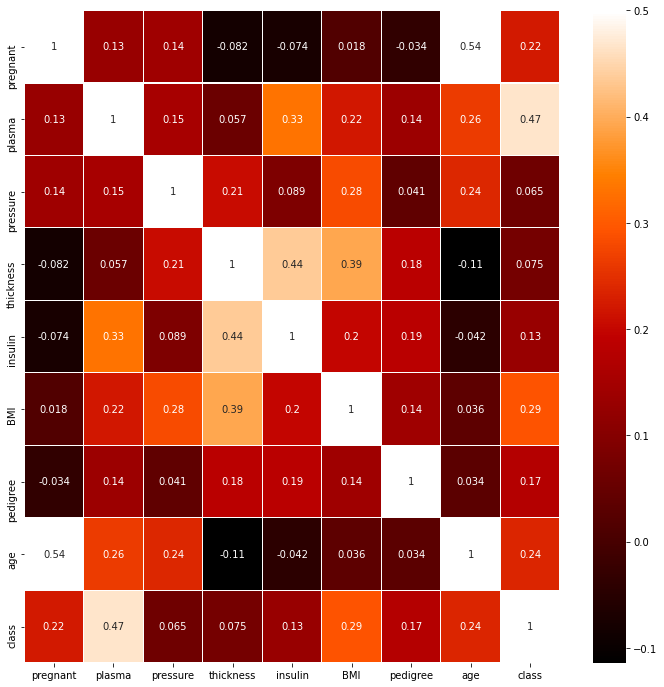

In [9]:
colormap = plt.cm.gist_heat   #그래프의 색상 구성
plt.figure(figsize=(12,12))   #그래프의 크기

# 그래프의 속성. vmax의 값을 0.5로 지정해 0.5에 가까울 수록 밝은 색으로 표시.
# 당뇨병 발병 여부를 가리키는 class 항목과 상관관계가 가장 높은 변수는 'plasma(공복혈당농도)'이다.
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

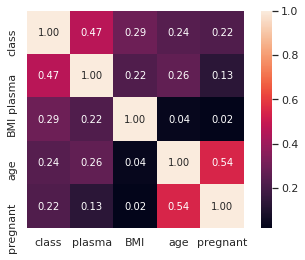

In [10]:
# 'Class' 변수와 강한 상관관계를 가지는 상위 5개 변수만을 이용해서 Heatmap을 그림.
cols = df.corr().nlargest(5, 'class')['class'].index

cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale = 1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

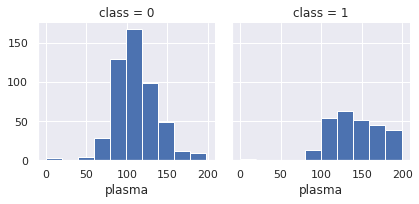

In [11]:
# class 변수가 1일 때, 즉 당뇨병 환자의 경우 plasma 항목의 수치가 150 이상이 많다는 것을 알 수 있음.
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma',  bins=10)
plt.show()

**피마 인디언의 당뇨병 예측 실행**

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
# 일정한 결과를 얻기 위해 넘파이 seed 값과 TF seed 값 모두 설정
np.random.seed(3)
tf.random.set_seed(3)

dataset = np.loadtxt('/content/drive/My Drive/Colab Notebooks/deep-learning-for-everyone/dataset/pima-indians-diabetes.csv', delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]

In [0]:
# 모델 설정.
model = Sequential()
# 은닉층 
model.add(Dense(12, input_dim=8, activation='relu'))    # (데이터 8개를 입력 받아서 은닉층의 12개의 노드로 보냄. 활성화함수는 ReLU)
model.add(Dense(8, activation='relu'))
# 출력층
model.add(Dense(1, activation='sigmoid'))

In [17]:
# 모델 컴파일. 이항 분류 문제(당뇨병 Class 0 or 1)이므로 오차함수는 binary_crossentropy, 최적화 함수로 adam을 사용.
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 모델 실행.
model.fit(X, Y, epochs=200, batch_size=10)

# 결과 출력.
print("\n Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

Train on 768 samples
Epoch 1/200
768/768 [==============================] - 1s 1ms/sample - loss: 11.4155 - accuracy: 0.6198
Epoch 2/200
768/768 [==============================] - 0s 174us/sample - loss: 6.4242 - accuracy: 0.6159
Epoch 3/200
768/768 [==============================] - 0s 172us/sample - loss: 3.6949 - accuracy: 0.5221
Epoch 4/200
768/768 [==============================] - 0s 178us/sample - loss: 2.2150 - accuracy: 0.5169
Epoch 5/200
768/768 [==============================] - 0s 173us/sample - loss: 1.3725 - accuracy: 0.5182
Epoch 6/200
768/768 [==============================] - 0s 165us/sample - loss: 0.9083 - accuracy: 0.5586
Epoch 7/200
768/768 [==============================] - 0s 165us/sample - loss: 0.7783 - accuracy: 0.5547
Epoch 8/200
768/768 [==============================] - 0s 166us/sample - loss: 0.7476 - accuracy: 0.6172
Epoch 9/200
768/768 [==============================] - 0s 185us/sample - loss: 0.7330 - accuracy: 0.6615
Epoch 10/200
768/768 [=============